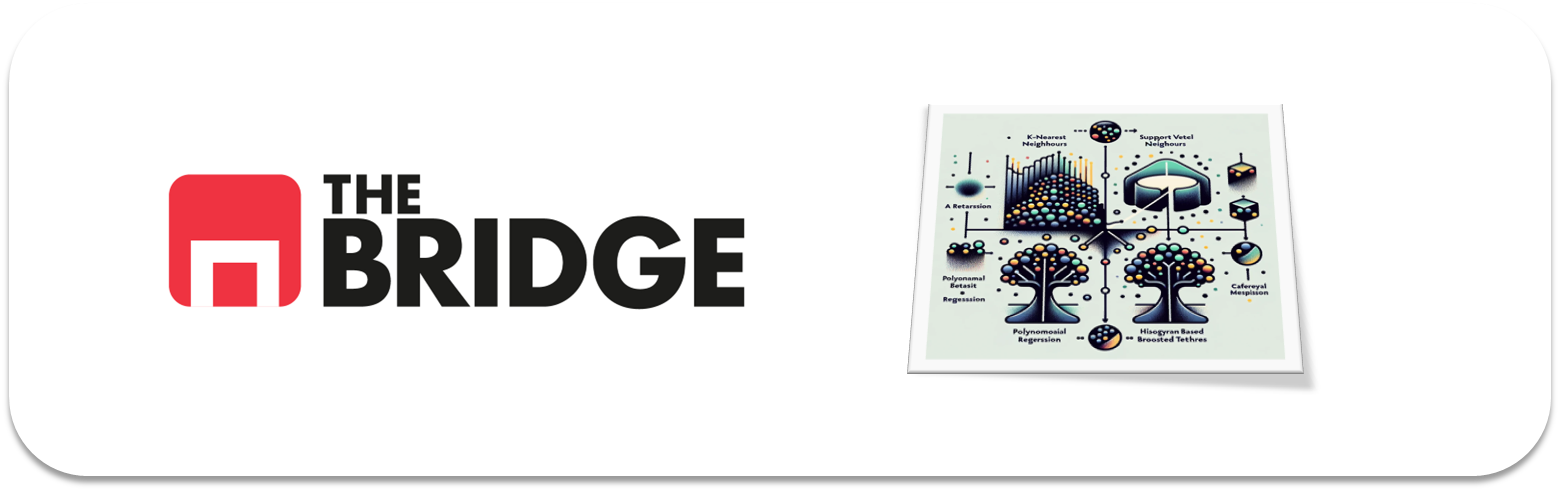

* La práctica consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

### **Explicación del dataset y carga de datos**

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

NOTA: El dataset está limpio y sin valores faltantes.

### **1.Librerías**

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import balanced_accuracy_score, accuracy_score, recall_score, f1_score, mean_absolute_percentage_error, make_scorer,classification_report

# mean_absolute_percentage_error ->regresion
#balanced_accuracy_score ->clasificacion

### **2.Carga de datos**

In [2]:
df= pd.read_csv('datasets/wines_dataset.csv',sep='|')

### **3.Primera exploración**

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
6492,7.7,0.39,0.34,10.0,0.056,35.0,178.0,0.99740,3.26,0.60,10.2,5,white
6493,8.2,0.73,0.21,1.7,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,red
6494,7.4,0.31,0.48,14.2,0.042,62.0,204.0,0.99830,3.06,0.59,9.4,5,white
6495,8.3,0.65,0.10,2.9,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,red
6496,8.4,0.67,0.19,2.2,0.093,11.0,75.0,0.99736,3.20,0.59,9.2,4,red


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.shape

(6497, 13)

In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
class                   0
dtype: int64

**Asumimos que no hay duplicados**

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
df.describe(include="object")

,class
count,6497
unique,2
top,white
freq,4898


**Observación:** Se asume que el DataFrame no tiene duplicados.

### **4.EDA**

#### **4.1.Cardinalidad y tipo de variables**

In [10]:
cardinalidad = pd.DataFrame({
    'Columna': df.columns,
    'Tipo_Variable':['Discreta' if x == 'int64' else 'Continua' if x=='float64' else 'Categórica' for x in df.dtypes],
    'Cardinalidad%':[round((df[col].nunique())/len(df)*100,2) for col in df.columns]})

cardinalidad

,Columna,Tipo_Variable,Cardinalidad%
0,fixed acidity,Continua,1.63
1,volatile acidity,Continua,2.88
2,citric acid,Continua,1.37
3,residual sugar,Continua,4.86
4,chlorides,Continua,3.29
5,free sulfur dioxide,Continua,2.08
6,total sulfur dioxide,Continua,4.25
7,density,Continua,15.36
8,pH,Continua,1.66
9,sulphates,Continua,1.71


#### **4.2.Análisis univariante**

In [11]:
#Funciónes de visualización

def grafico_histplot(column,df):
    
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de la variable {column}')
    plt.xlabel(f'Valores de {column}')
    plt.ylabel('Frecuencia')
    
    return plt.show()

def grafico_countplot(column,df):

    custom_palette = sns.color_palette("husl", len(df[column].unique()))
    sns.countplot(x=column, hue=column, data=df, palette=custom_palette, stat='percent')

    return plt.show()

**Columna 'quality', target modelo de clasificación**

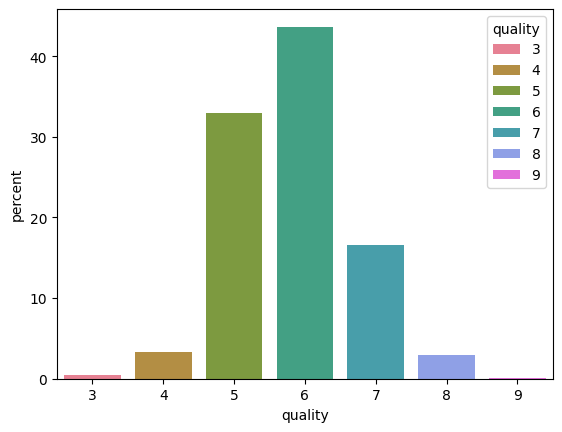

In [12]:
grafico_countplot('quality',df)

In [13]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

**Columna 'alcohol', target modelo de regresión**

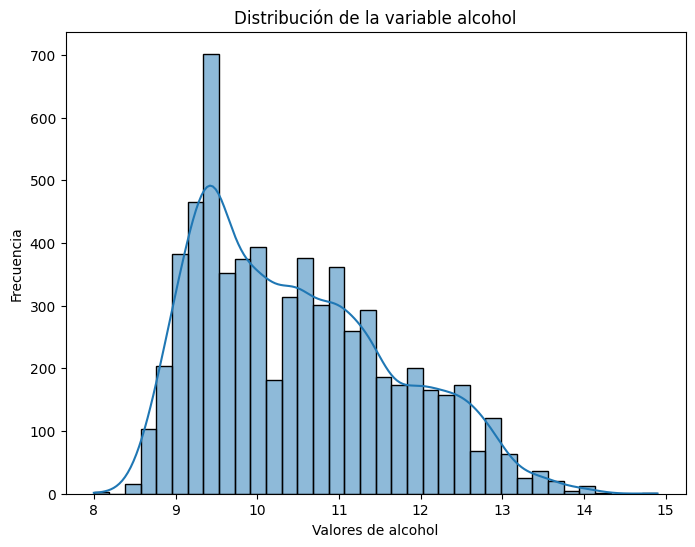

In [14]:
grafico_histplot('alcohol',df)

**Columna 'fixed acidity'**

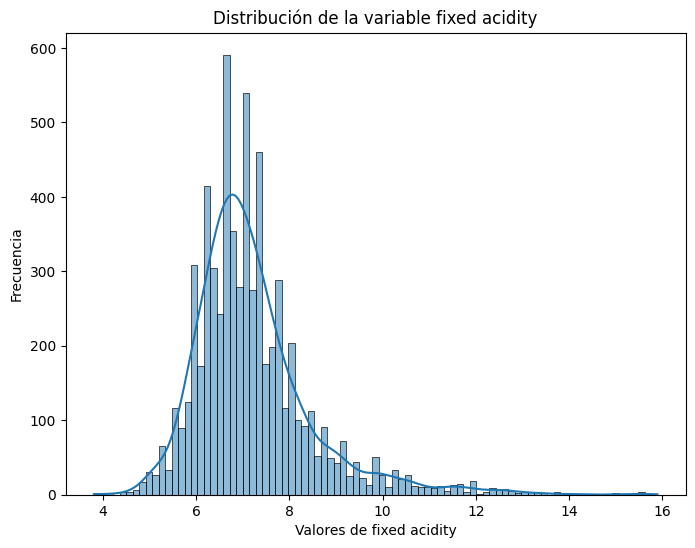

In [15]:
grafico_histplot('fixed acidity',df)

**Columna 'volatile acidity'**

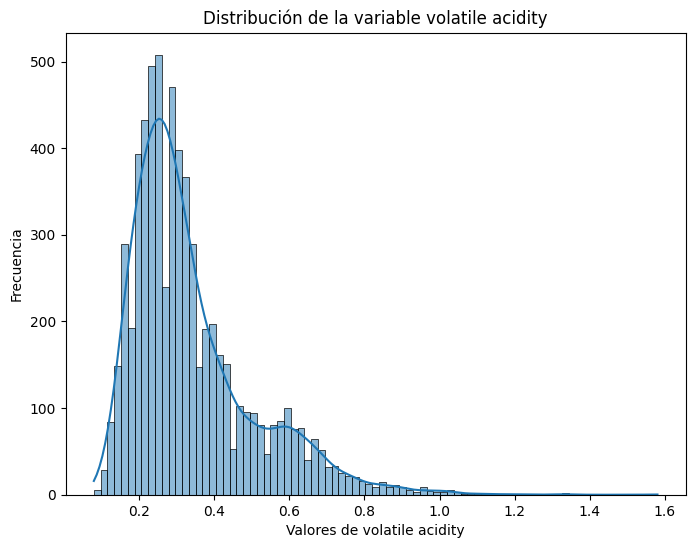

In [16]:
grafico_histplot('volatile acidity',df)

**Columna 'citric acid'**

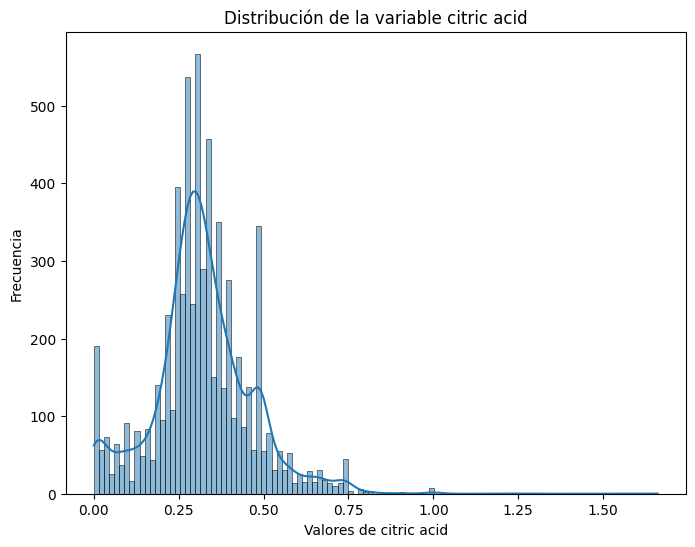

In [17]:
grafico_histplot('citric acid',df)

**Columna 'residual sugar'**

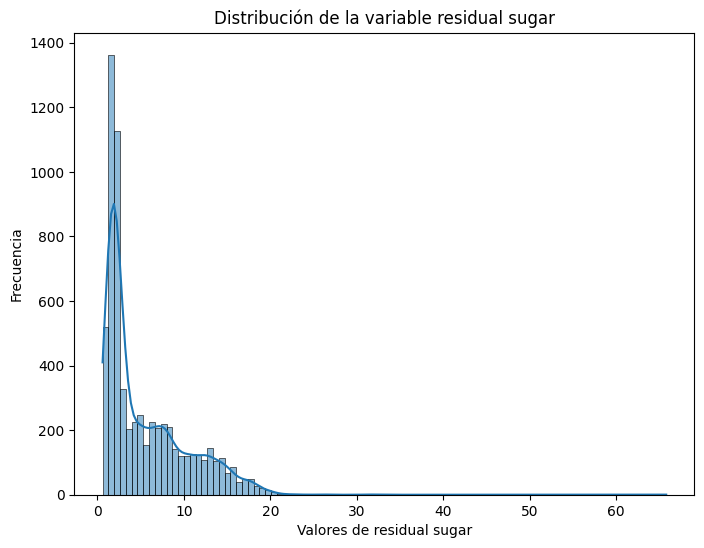

In [18]:
grafico_histplot('residual sugar',df)

**Columna 'chlorides'**

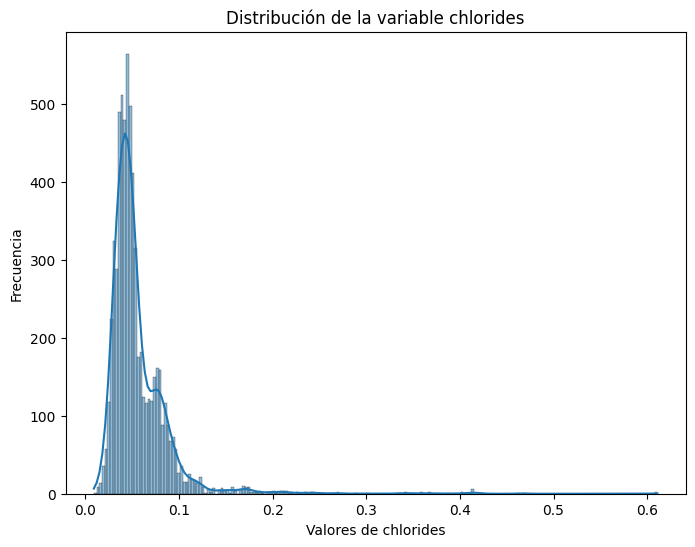

In [19]:
grafico_histplot('chlorides',df)

**Columna 'free sulfur dioxide'**

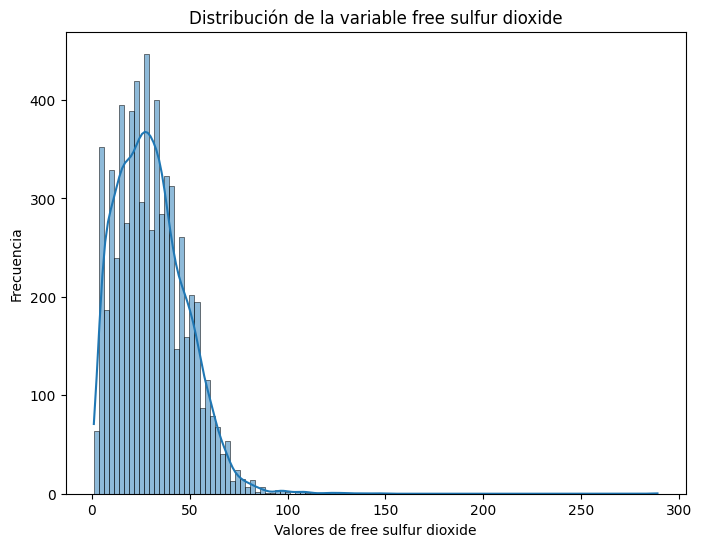

In [20]:
grafico_histplot('free sulfur dioxide',df)

**Columna 'total sulfur dioxide'**

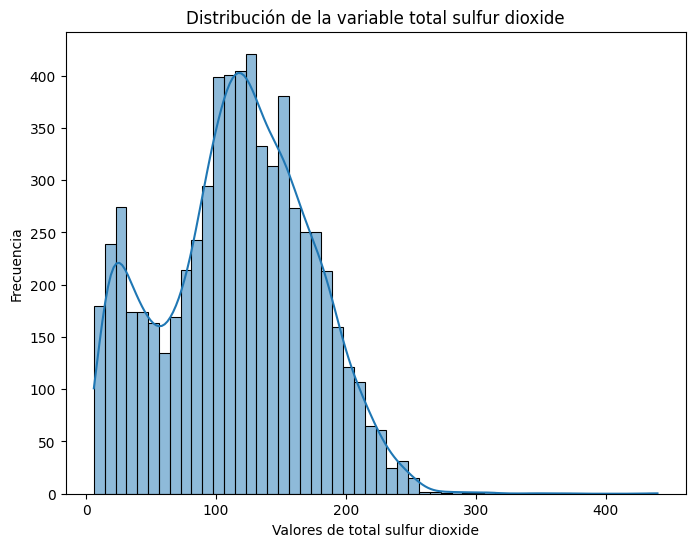

In [21]:
grafico_histplot('total sulfur dioxide',df)

**Columna 'density'**

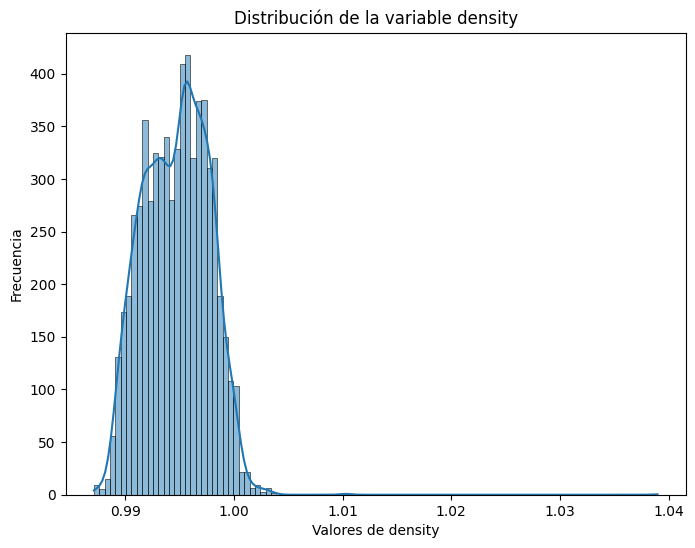

In [22]:
grafico_histplot('density',df)

**Columna 'pH'**

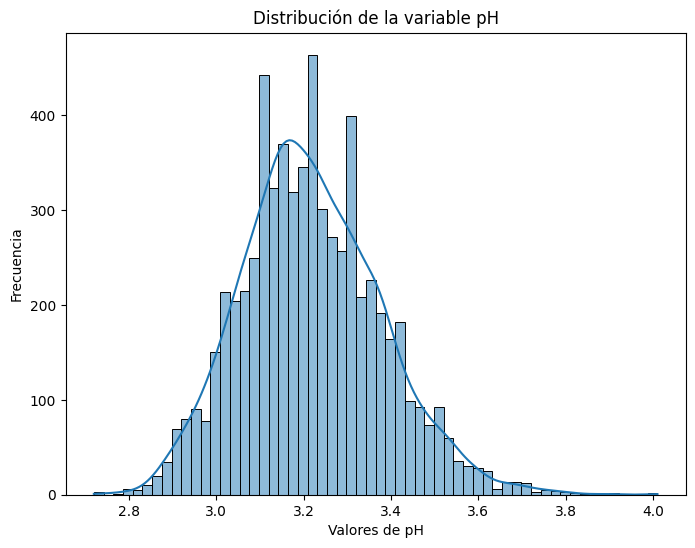

In [23]:
grafico_histplot('pH',df)

**Columna 'sulphates'**

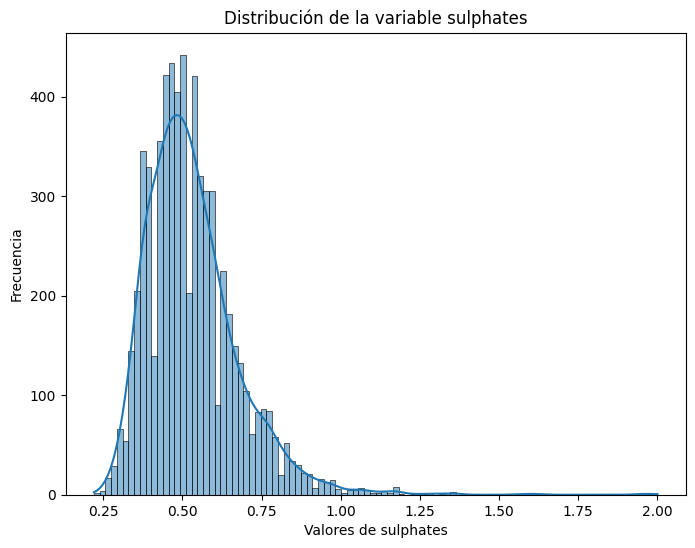

In [24]:
grafico_histplot('sulphates',df)

**Columna class**

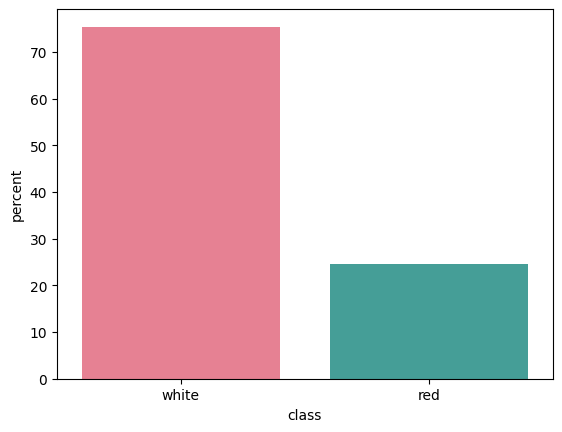

In [25]:
grafico_countplot('class',df)

In [26]:
df['class'].value_counts()

class
white    4898
red      1599
Name: count, dtype: int64

#### **4.3.Análisis bivariante**

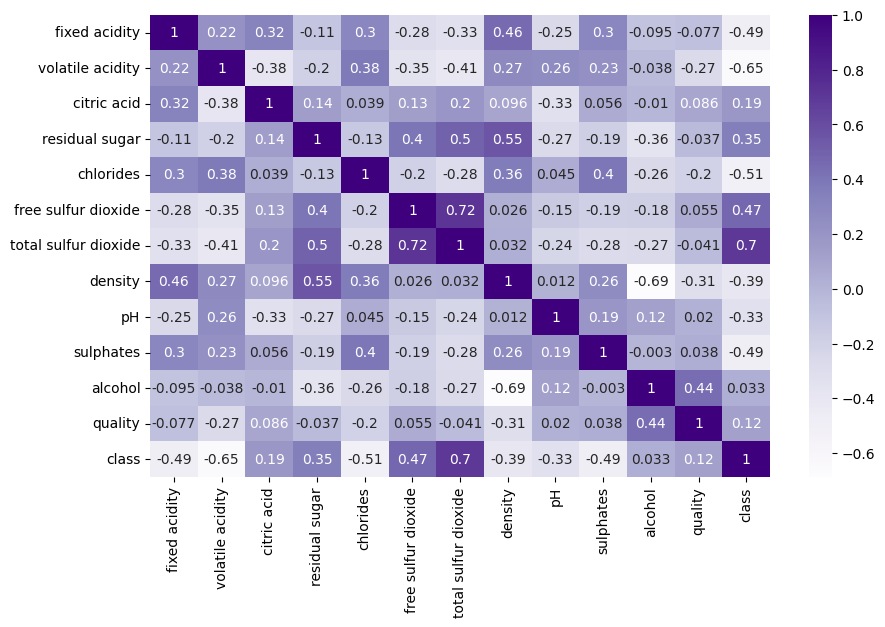

In [27]:
#heatmap

#mapeo provisional de class para la visualización del mapa de calor
df_map= df.copy()
df_map['class'] = df_map['class'].map({'red': 0, 'white': 1})
df_map['class'] = df_map['class'].astype(float)

plt.figure(figsize=(10, 6))
sns.heatmap(df_map.corr(), annot=True, cmap='Purples');

**'quality' Vs 'class'**

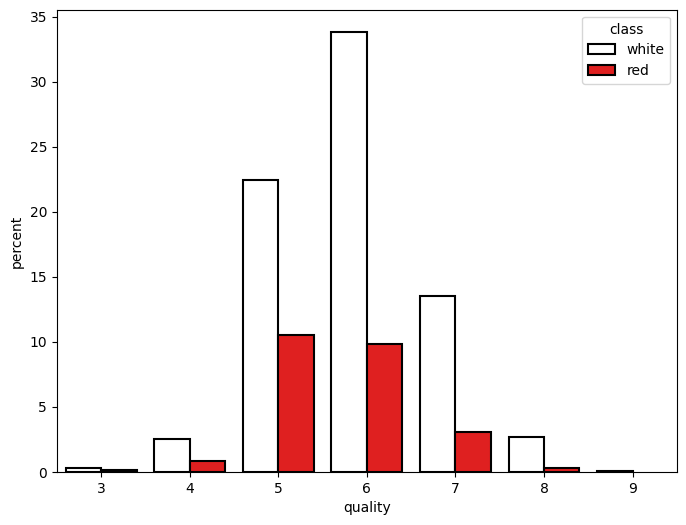

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, hue='class', palette=['white', 'red'], edgecolor='black', linewidth=1.5, stat='percent')
plt.show()


**'alcohol' Vs 'class'**

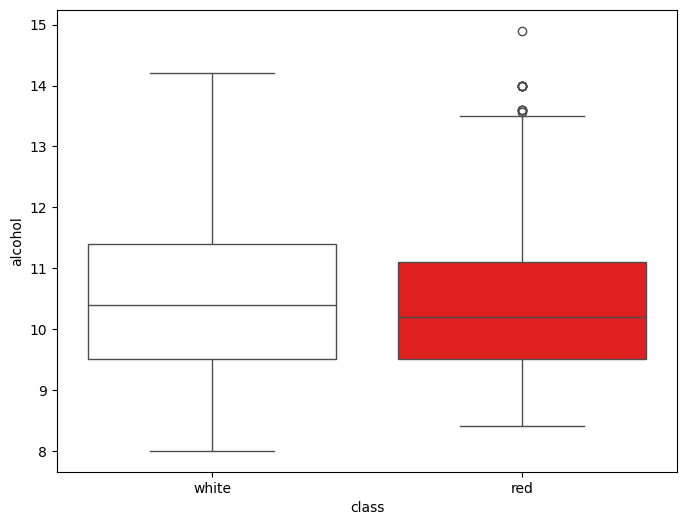

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='alcohol',hue='class', data=df, palette=['white', 'red'])

plt.show()

**Relación de 'quality' y 'class', teniendo en cuenta la clasificación de 'class'**

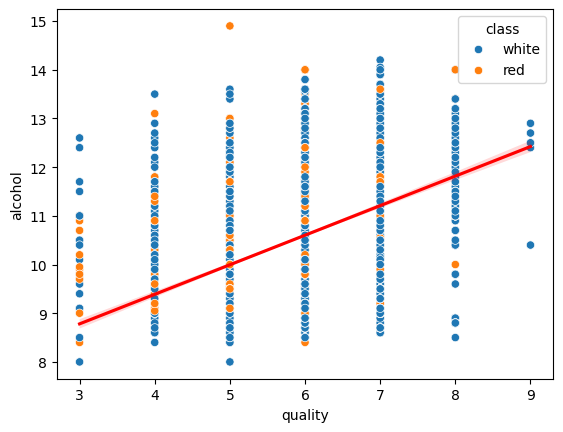

In [30]:
sns.scatterplot(data=df, x='quality', y='alcohol', hue='class')
sns.regplot(x='quality', y='alcohol', data=df, scatter=False, color='red')

plt.show()

**Bivariante 'quality'**

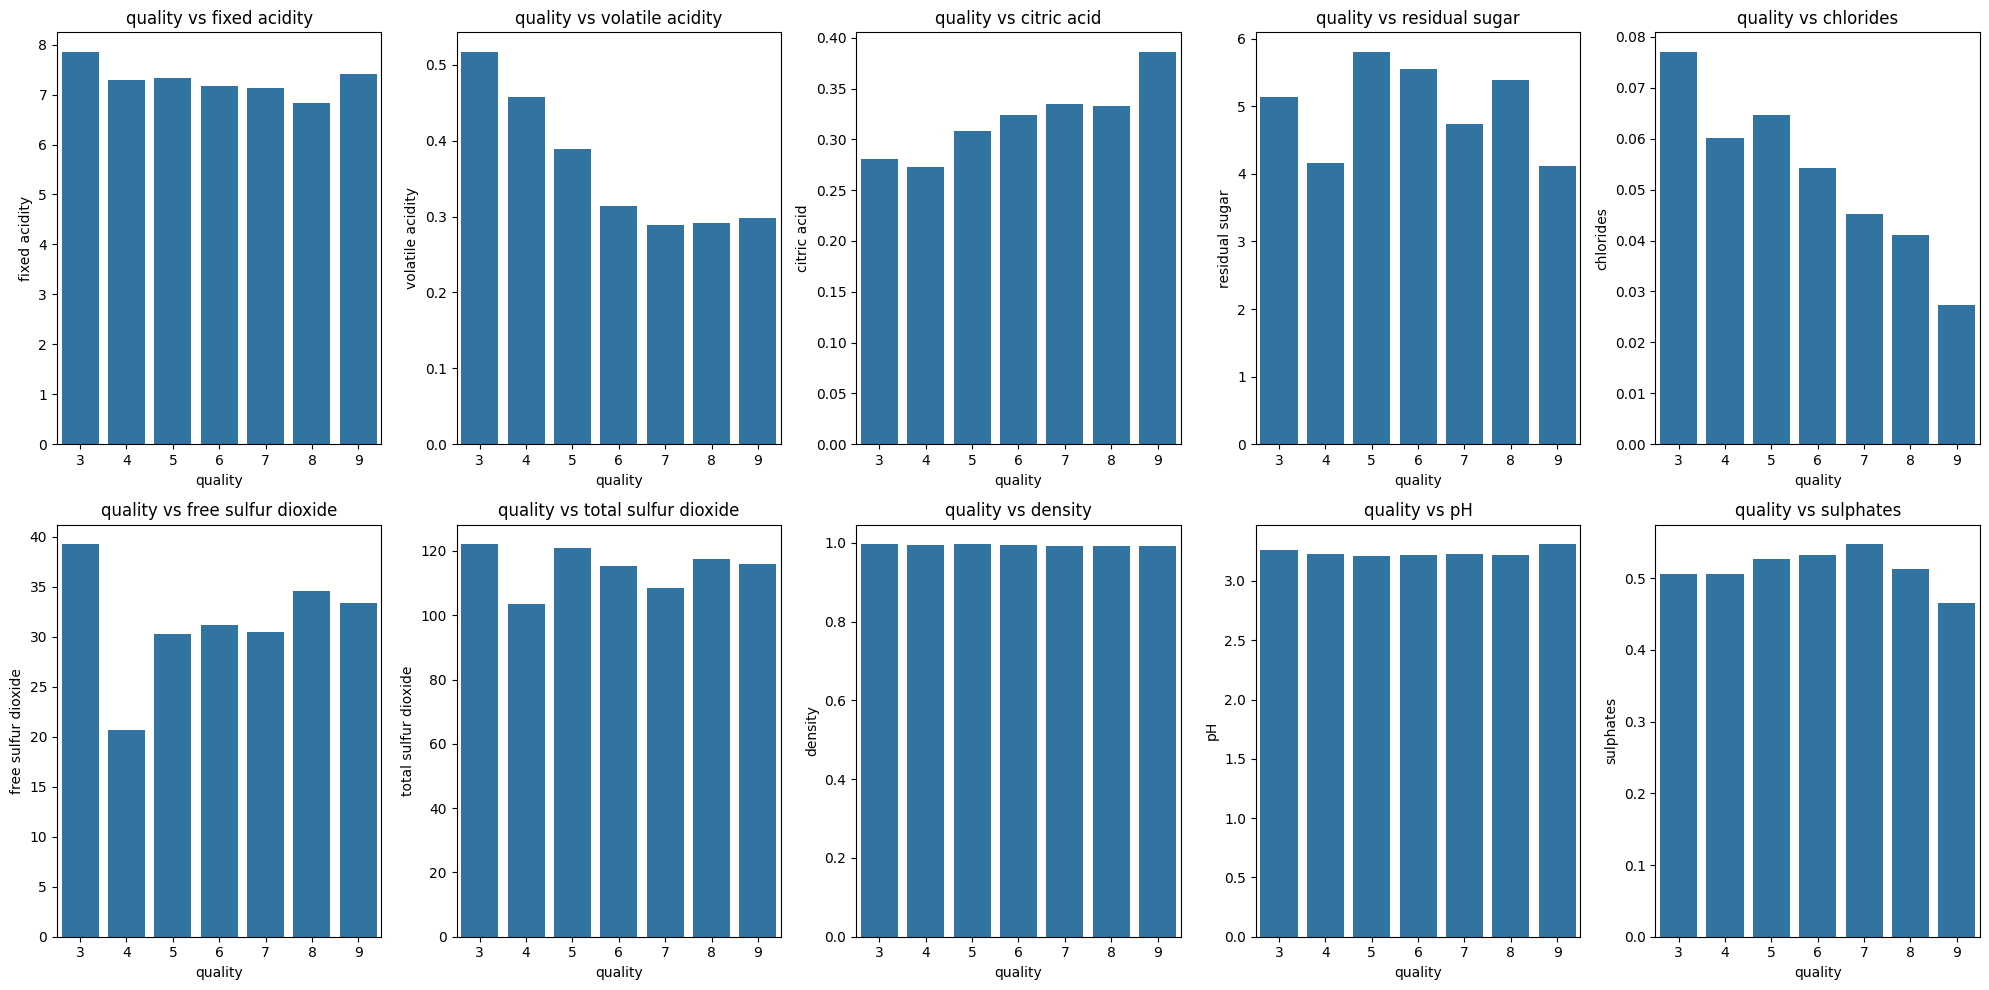

In [31]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

df_quality = df.drop(columns=['alcohol', 'class'])

for i, (column, ax) in enumerate(zip(df_quality.columns, axes.flatten())):
    sns.barplot(x='quality', y=column, data=df, errorbar=None, ax=ax)
    ax.set_xlabel('quality')
    ax.set_ylabel(column)
    ax.set_title(f'quality vs {column}')

plt.tight_layout()

plt.show()

**Bivariante 'alcohol'**

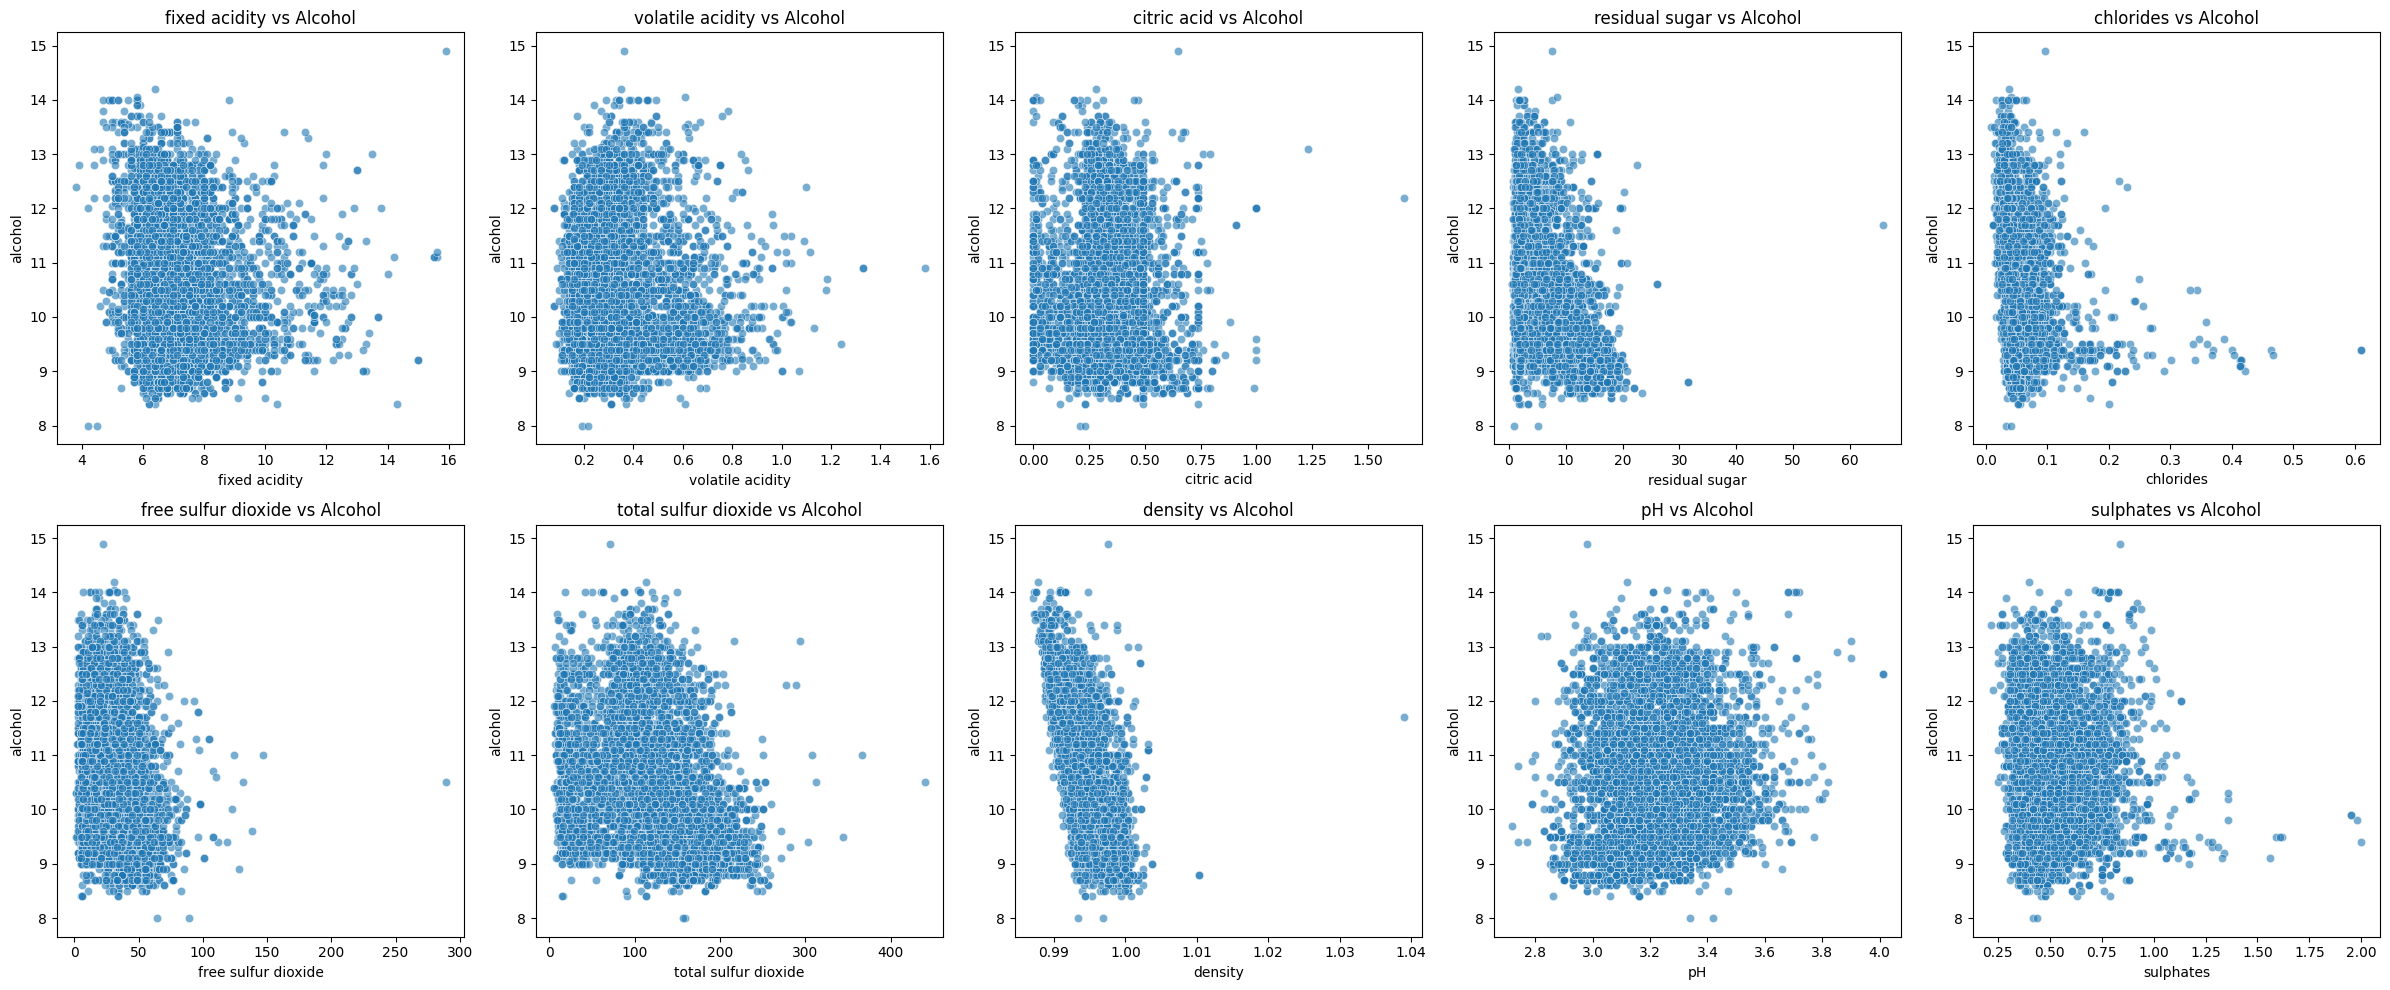

In [32]:
fig, axes = plt.subplots(2, 5, figsize=(24, 10))

df_alcohol= df.drop(columns=['class', 'quality','alcohol'])


for i, column in enumerate(df_alcohol.columns):
    sns.scatterplot(data=df, x=column, y='alcohol', alpha=0.6, ax=axes[i // 5, i % 5])
    axes[i // 5, i % 5].set_title(f'{column} vs Alcohol')

plt.tight_layout()

plt.show()

### **5.Feature Engineer**

In [33]:
#Eliminamos columna free sulfur dioxide por alta correlación con total sulfur dioxide
df= df.drop('total sulfur dioxide', axis=1)

### **6.Modelado para clasificación**

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros. El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora.

In [34]:
#Copia de DataFrame original para modelo de clasificación
df1=df.copy()

Recodificaremos la target en 3 categorías: calidad baja para los valores de quality entre 3 y 5 inclusive, calidad media para los valores de 6 y calidad alta para valores superiores a 7, asignándole a cada categoría:

+ 0: Calidad baja

+ 1: Calidad media

+ 2: Calidad alta


In [35]:
df1['quality_cat'] = df1['quality'].apply(lambda x: 0 if x <= 5 else (1 if x == 6 else 2))

In [36]:
df1['quality_cat'].value_counts()

quality_cat
1    2836
0    2384
2    1277
Name: count, dtype: int64

In [37]:
df1= df1.drop('quality', axis=1)

#### **División del dataset**

In [38]:
#División dataset----> train y test
train_set, test_set= train_test_split(df1, test_size=0.2, random_state=42)
X_train= train_set.drop('quality_cat', axis=1)
y_train=train_set['quality_cat']
X_test=test_set.drop('quality_cat', axis=1)
y_test=test_set['quality_cat']

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 11)
(1300, 11)
(5197,)
(1300,)


#### **Preprocesamiento**

In [40]:
# Columnas para aplicar logaritmo
log_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','free sulfur dioxide']

# Columnas para aplicar MinMaxScaler
esc_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']

#Aplicamos logaritmo
X_train[log_columns] = np.log(X_train[log_columns]+1)
X_test[log_columns] = np.log(X_test[log_columns]+1)


#Aplicamos StandarScaler
esc = StandardScaler()
X_train[esc_columns] = esc.fit_transform(X_train[esc_columns])
X_test[esc_columns] = esc.transform(X_test[esc_columns])

#Aplicamos OneHot a columnas 'class'
ohe = OneHotEncoder(drop='first',sparse_output=False, handle_unknown='ignore')

ohe.fit(X_train[['class']])

transformed_X_train = ohe.transform(X_train[['class']])
transformed_df = pd.DataFrame(transformed_X_train, columns=ohe.get_feature_names_out(['class']), index=X_train.index)
X_train_sca_ohe = pd.concat([X_train, transformed_df], axis=1).drop(columns=['class'])

transformed_X_test = ohe.transform(X_test[['class']])
transformed_df = pd.DataFrame(transformed_X_test, columns=ohe.get_feature_names_out(['class']), index=X_test.index)
X_test_sca_ohe = pd.concat([X_test, transformed_df], axis=1).drop(columns=['class'])


#### **Cross-Validation + Base-Lines**

In [ ]:
modelos = {
    "Decision Tree": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "XGBClassifier": XGBClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "Logistic Regression": LogisticRegression(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "HistGradientBossstingClassifier": HistGradientBoostingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier()
}

resultados = []

# Cross-validation
for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train_sca_ohe, y_train, cv=5, scoring='balanced_accuracy')
    mean_score = scores.mean()
    resultados.append({'Modelo': nombre, 'Balanced Accuracy': mean_score})

results_df = pd.DataFrame(resultados)

In [51]:
results_df.sort_values(by= 'Balanced Accuracy', ascending=False)


,Modelo,Balanced Accuracy
1,RandomForestClassifier,0.672793
4,XGBClassifier,0.667209
8,HistGradientBossstingClassifier,0.664611
5,LGBMClassifier,0.653016
0,Decision Tree,0.618109
7,GradientBoostingClassifier,0.585800
2,KNN,0.582276
3,SVC,0.557965
6,Logistic Regression,0.540722
9,AdaBoostClassifier,0.533768


#### **Entrenamiento**

In [52]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_sca_ohe, y_train)

RandomForestClassifier(random_state=42)

#### **Predicción**

In [53]:
y_pred = rf.predict(X_test_sca_ohe)
y_pred

array([0, 2, 2, ..., 2, 0, 0])

### **Validación del modelo**

In [54]:
print(classification_report(y_test, y_pred))

balanced_accuracy_score = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy Score:", balanced_accuracy_score)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       481
           1       0.67      0.73      0.70       562
           2       0.74      0.65      0.69       257

    accuracy                           0.72      1300
   macro avg       0.73      0.71      0.72      1300
weighted avg       0.73      0.72      0.73      1300

Balanced Accuracy Score: 0.7130305644713609


### **Optimización para el modelo**

In [44]:
param_grid = {
   'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='balanced_accuracy')

grid_search.fit(X_train_sca_ohe, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación (balanced accuracy):", grid_search.best_score_)

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mejor puntuación (balanced accuracy): 0.6822109081066721


Entrenamos con el modelo optimizado

In [41]:
rf = RandomForestClassifier(max_depth=20, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200,random_state=42)
rf.fit(X_train_sca_ohe, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [43]:
y_pred = rf.predict(X_test_sca_ohe)
y_pred

array([0, 1, 2, ..., 2, 1, 0])

In [44]:
print(classification_report(y_test, y_pred))

balanced_accuracy_score = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy Score:", balanced_accuracy_score)

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       481
           1       0.68      0.75      0.72       562
           2       0.76      0.66      0.71       257

    accuracy                           0.74      1300
   macro avg       0.75      0.72      0.73      1300
weighted avg       0.74      0.74      0.74      1300

Balanced Accuracy Score: 0.723734679257617


###  **7.Modelado para regresión**

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara los modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros. Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [3]:
df2=df.copy()

In [4]:
df2= df2.drop('total sulfur dioxide', axis=1)

In [5]:
#División dataset----> train y test
train_set, test_set= train_test_split(df2, test_size=0.2, random_state=42)
X_train= train_set.drop('alcohol', axis=1)
y_train=train_set['alcohol']
X_test=test_set.drop('alcohol', axis=1)
y_test=test_set['alcohol']

In [6]:
# Columnas para aplicar logaritmo
log_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'free sulfur dioxide']

# Columnas para aplicar MinMaxScaler
sca = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                  'chlorides', 'free sulfur dioxide', 'density',
                  'pH', 'sulphates']

#Aplicamos logaritmo
X_train[log_columns] = np.log(X_train[log_columns]+1)
X_test[log_columns] = np.log(X_test[log_columns]+1)

#Aplicamos MinMaxScaler
esc = StandardScaler()
X_train[sca] = esc.fit_transform(X_train[sca])
X_test[sca] = esc.transform(X_test[sca])

#Aplicamos OneHot a columnas 'class'
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

ohe.fit(X_train[['class']])

transformed_X_train = ohe.transform(X_train[['class']])
transformed_df = pd.DataFrame(transformed_X_train, columns=ohe.get_feature_names_out(['class']), index=X_train.index)
X_train_sca_ohe = pd.concat([X_train, transformed_df], axis=1).drop(columns=['class'])

transformed_X_test = ohe.transform(X_test[['class']])
transformed_df = pd.DataFrame(transformed_X_test, columns=ohe.get_feature_names_out(['class']), index=X_test.index)
X_test_sca_ohe = pd.concat([X_test, transformed_df], axis=1).drop(columns=['class'])

In [69]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
modelos = [
    ("RandomForest", RandomForestRegressor()),
    ("LinearRegression", LinearRegression()),
    ("Ridge", Ridge()),
    ("Lasso", Lasso()),
    ("ElasticNet", ElasticNet()),
    ("DecisionTree", DecisionTreeRegressor()),
    ("AdaBoost", AdaBoostRegressor()),
    ("GradientBoosting", GradientBoostingRegressor())
]

for name, model in modelos:
    predicted = cross_val_predict(model, X_train_sca_ohe, y_train, cv=5)
   
    mape = mean_absolute_percentage_error(y_train, predicted)

    print(f"Modelo: {name}")
    print("Mean Absolute Percentage Error (MAPE):", mape)


Modelo: RandomForest
Mean Absolute Percentage Error (MAPE): 0.02673134273898363
Modelo: LinearRegression
Mean Absolute Percentage Error (MAPE): 0.03908847571442108
Modelo: Ridge
Mean Absolute Percentage Error (MAPE): 0.03911875020028967
Modelo: Lasso
Mean Absolute Percentage Error (MAPE): 0.0948240813980025
Modelo: ElasticNet
Mean Absolute Percentage Error (MAPE): 0.08404696821598549
Modelo: DecisionTree
Mean Absolute Percentage Error (MAPE): 0.0336198020167016
Modelo: AdaBoost
Mean Absolute Percentage Error (MAPE): 0.0564388542475488
Modelo: GradientBoosting
Mean Absolute Percentage Error (MAPE): 0.03459469067400134


In [7]:
lasso= Lasso(alpha=1.0, random_state=42)  
lasso.fit(X_train_sca_ohe, y_train)


y_test_pred = lasso.predict(X_test_sca_ohe)

mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print("MAPE en los datos de prueba:", mape_test)

MAPE en los datos de prueba: 0.09382460772689682
